In [46]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
import matplotlib.pyplot as plt
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
import math

In [47]:
base_url = "https://nextspaceflight.com/launches/past/"
last_page = 2


In [48]:


options = Options()
options.add_argument("--headless=new")
browser = webdriver.Chrome(options=options)

launch_data = []
for page in range(1, last_page + 1):
    browser.get(f"{base_url}?page={page}")
    cards = browser.find_elements(By.CLASS_NAME, "mdl-card")
    for card in cards:
        company = card.find_element(By.CLASS_NAME, "mdl-card__title-text").text
        rocket_and_payload = card.find_element(By.CLASS_NAME, "header-style").text
        date_and_location = card.find_element(By.CLASS_NAME, "mdl-card__supporting-text").text
        details_url = card.find_element(By.CLASS_NAME, "mdc-button").get_attribute("href")
        border_color = card.value_of_css_property("border-top-color")

        if "rgba(69, 207, 93, 1)" == border_color:
            successful = "1" #Exito
        else:
            successful = "0" #Fracaso

        launch_dict = {
            'company': company,
            'rocket_and_payload': rocket_and_payload,
            'date_and_location': date_and_location,
            'details_url': details_url,
            'successful': successful
        }
        launch_data.append(launch_dict)
browser.quit()

df = pd.DataFrame(launch_data, columns=['company', 'rocket_and_payload', 'date_and_location', 'details_url', 'successful'])

In [49]:
browser = webdriver.Chrome(options=options)
wait = WebDriverWait(browser, 10)


prices = []
leo_weights = []  
gto_weights = []  
rocket_heights = []
fairing_diameters = []
fairing_heights = []

for index in range(len(df.details_url)):
    print(f"Processing launch {index + 1}/{len(df.details_url)}")#pensar en quitar
    browser.get(df.details_url[index])

    details_els = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, "mdl-card__supporting-text")))
    details_texts = [el.text for el in details_els]

    price = 0.0
    leo_weight = 0
    gto_weight = 0
    rocket_h = 0.0
    fairing_d = 0.0
    fairing_h = 0.0

    if len(details_texts) > 1:
        parts = details_texts[1].split("\n")
        for part in parts:
            if "Price: " in part:
                price = part.replace("Price: $", "").replace(" million", "").strip()
                price = float(price)
            elif "Payload to LEO:" in part:
                leo_weight = part.replace("Payload to LEO:", "").replace("kg", "").strip()
                leo_weight = int(leo_weight.replace(',', ''))
            elif "Payload to GTO:" in part:
                gto_weight = part.replace("Payload to GTO:", "").replace("kg", "").strip()
                gto_weight = int(gto_weight.replace(',', ''))
            elif "Rocket Height:" in part:  
                rocket_h = part.replace("Rocket Height:", "").replace("m", "").strip()
                rocket_h = float(rocket_h)
            elif "Fairing Diameter:" in part:
                fairing_d = part.replace("Fairing Diameter:", "").replace("m", "").strip()
                fairing_d = float(fairing_d)
            elif "Fairing Height:" in part:
                fairing_h = part.replace("Fairing Height:", "").replace("m", "").strip()
                fairing_h = float(fairing_h)

   
    prices.append(price)
    leo_weights.append(leo_weight)
    gto_weights.append(gto_weight)
    rocket_heights.append(rocket_h)
    fairing_diameters.append(fairing_d)
    fairing_heights.append(fairing_h)

browser.quit()


df["price_million"] = prices
df["leo_weight_kg"] = leo_weights
df["gto_weight_kg"] = gto_weights
df["total_payload_kg"] = df["leo_weight_kg"] + df["gto_weight_kg"]
df["rocket_height_m"] = rocket_heights
df["fairing_diameter_m"] = fairing_diameters
df["fairing_height_m"] = fairing_heights

df

Processing launch 1/60
Processing launch 2/60
Processing launch 3/60
Processing launch 4/60
Processing launch 5/60
Processing launch 6/60
Processing launch 7/60
Processing launch 8/60
Processing launch 9/60
Processing launch 10/60
Processing launch 11/60
Processing launch 12/60
Processing launch 13/60
Processing launch 14/60
Processing launch 15/60
Processing launch 16/60
Processing launch 17/60
Processing launch 18/60
Processing launch 19/60
Processing launch 20/60
Processing launch 21/60
Processing launch 22/60
Processing launch 23/60
Processing launch 24/60
Processing launch 25/60
Processing launch 26/60
Processing launch 27/60
Processing launch 28/60
Processing launch 29/60
Processing launch 30/60
Processing launch 31/60
Processing launch 32/60
Processing launch 33/60
Processing launch 34/60
Processing launch 35/60
Processing launch 36/60
Processing launch 37/60
Processing launch 38/60
Processing launch 39/60
Processing launch 40/60
Processing launch 41/60
Processing launch 42/60
P

,company,rocket_and_payload,date_and_location,details_url,successful,price_million,leo_weight_kg,gto_weight_kg,total_payload_kg,rocket_height_m,fairing_diameter_m,fairing_height_m
0,Roscosmos,Soyuz 2.1a | Progress MS-32,"Thu Sep 11, 2025 12:54 GMT-3\nSite 31/6, Baiko...",https://nextspaceflight.com/launches/details/7710,1,17.42,7500,0,7500,51.38,4.11,15.59
1,SpaceX,Falcon 9 Block 5 | Tranche 1 Transport Layer B,"Wed Sep 10, 2025 11:12 GMT-3\nSLC-4E, Vandenbe...",https://nextspaceflight.com/launches/details/7219,1,69.75,22800,8300,31100,70.00,5.20,13.00
2,CASC,Long March 7A | Yaogan 45,"Mon Sep 8, 2025 23:00 GMT-3\nLC-201, Wenchang ...",https://nextspaceflight.com/launches/details/7943,1,0.00,12000,7000,19000,58.00,4.20,12.40
3,Chinarocket,Jielong 3 | Geely Constellation Group 05,"Mon Sep 8, 2025 16:48 GMT-3\nOriental Spacepor...",https://nextspaceflight.com/launches/details/7942,1,0.00,1500,0,1500,31.00,3.35,0.00
4,SpaceX,Falcon 9 Block 5 | Starlink Group 17-9,"Sat Sep 6, 2025 2:06 PM GMT-4\nSLC-4E, Vandenb...",https://nextspaceflight.com/launches/details/7935,1,69.75,22800,8300,31100,70.00,5.20,13.00
5,CASC,Long March 6A | Yaogan 40 Group 03,"Sat Sep 6, 2025 12:34 PM GMT-4\nLC-9A, Taiyuan...",https://nextspaceflight.com/launches/details/7940,1,0.00,5000,0,5000,50.00,4.20,5.70
6,SpaceX,Falcon 9 Block 5 | Starlink Group 10-57,"Fri Sep 5, 2025 8:32 AM GMT-4\nLC-39A, Kennedy...",https://nextspaceflight.com/launches/details/7934,1,69.75,22800,8300,31100,70.00,5.20,13.00
7,Galactic Energy,Ceres 1 | 3 satellites,"Fri Sep 5, 2025 7:39 AM GMT-4\nSite 95A, Jiuqu...",https://nextspaceflight.com/launches/details/7939,1,4.38,400,0,400,19.00,1.40,2.50
8,CASC,Long March 3C/YZ-1 | Shiyan 29,"Thu Sep 4, 2025 10:34 PM GMT-4\nLC-2, Xichang ...",https://nextspaceflight.com/launches/details/7938,1,20.00,7500,3500,11000,55.64,4.20,9.78
9,SpaceX,Falcon 9 Block 5 | Starlink Group 10-22,"Wed Sep 3, 2025 7:56 AM GMT-4\nSLC-40, Cape Ca...",https://nextspaceflight.com/launches/details/7930,1,69.75,22800,8300,31100,70.00,5.20,13.00


In [50]:
df.size
df.shape

(60, 12)

In [51]:
df["rocket"] = df["rocket_and_payload"].str.split("|").str[0]
df["payload"] = df["rocket_and_payload"].str.split("|").str[1]
df["date"] = df["date_and_location"].str.split("\n").str[0]
df["location"] = df["date_and_location"].str.split("\n").str[1]
df.drop(columns=["rocket_and_payload", "date_and_location"], inplace=True)
df

,company,details_url,successful,price_million,leo_weight_kg,gto_weight_kg,total_payload_kg,rocket_height_m,fairing_diameter_m,fairing_height_m,rocket,payload,date,location
0,Roscosmos,https://nextspaceflight.com/launches/details/7710,1,17.42,7500,0,7500,51.38,4.11,15.59,Soyuz 2.1a,Progress MS-32,"Thu Sep 11, 2025 12:54 GMT-3","Site 31/6, Baikonur Cosmodrome, Kazakhstan"
1,SpaceX,https://nextspaceflight.com/launches/details/7219,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Tranche 1 Transport Layer B,"Wed Sep 10, 2025 11:12 GMT-3","SLC-4E, Vandenberg SFB, California, USA"
2,CASC,https://nextspaceflight.com/launches/details/7943,1,0.00,12000,7000,19000,58.00,4.20,12.40,Long March 7A,Yaogan 45,"Mon Sep 8, 2025 23:00 GMT-3","LC-201, Wenchang Space Launch Site, China"
3,Chinarocket,https://nextspaceflight.com/launches/details/7942,1,0.00,1500,0,1500,31.00,3.35,0.00,Jielong 3,Geely Constellation Group 05,"Mon Sep 8, 2025 16:48 GMT-3","Oriental Spaceport Launch Ship (Area 1), China..."
4,SpaceX,https://nextspaceflight.com/launches/details/7935,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Starlink Group 17-9,"Sat Sep 6, 2025 2:06 PM GMT-4","SLC-4E, Vandenberg SFB, California, USA"
5,CASC,https://nextspaceflight.com/launches/details/7940,1,0.00,5000,0,5000,50.00,4.20,5.70,Long March 6A,Yaogan 40 Group 03,"Sat Sep 6, 2025 12:34 PM GMT-4","LC-9A, Taiyuan Satellite Launch Center, China"
6,SpaceX,https://nextspaceflight.com/launches/details/7934,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Starlink Group 10-57,"Fri Sep 5, 2025 8:32 AM GMT-4","LC-39A, Kennedy Space Center, Florida, USA"
7,Galactic Energy,https://nextspaceflight.com/launches/details/7939,1,4.38,400,0,400,19.00,1.40,2.50,Ceres 1,3 satellites,"Fri Sep 5, 2025 7:39 AM GMT-4","Site 95A, Jiuquan Satellite Launch Center, China"
8,CASC,https://nextspaceflight.com/launches/details/7938,1,20.00,7500,3500,11000,55.64,4.20,9.78,Long March 3C/YZ-1,Shiyan 29,"Thu Sep 4, 2025 10:34 PM GMT-4","LC-2, Xichang Satellite Launch Center, China"
9,SpaceX,https://nextspaceflight.com/launches/details/7930,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Starlink Group 10-22,"Wed Sep 3, 2025 7:56 AM GMT-4","SLC-40, Cape Canaveral SFS, Florida, USA"


In [52]:
def clean_date(scraped_date_string):
    months = {"Jan":"01", "Feb":"02", "Mar":"03", "Apr":"04", "May":"05", "Jun":"06",
              "Jul":"07", "Aug":"08", "Sep":"09", "Oct":"10", "Nov":"11", "Dec":"12"}
    parts = scraped_date_string.split(" ")
    month = parts[1]
    day = parts[2].replace(",", "")
    year = parts[3]
    return f"{year}/{months[month]}/{day}"

In [53]:
df["cleaned_date"] = df["date"].apply(clean_date)
df["year"] = df["cleaned_date"].str.split("/").str[0]
df["month"] = df["cleaned_date"].str.split("/").str[1]
df["day"] = df["cleaned_date"].str.split("/").str[2]
df.drop(columns=["date", "cleaned_date"], inplace=True)
df

,company,details_url,successful,price_million,leo_weight_kg,gto_weight_kg,total_payload_kg,rocket_height_m,fairing_diameter_m,fairing_height_m,rocket,payload,location,year,month,day
0,Roscosmos,https://nextspaceflight.com/launches/details/7710,1,17.42,7500,0,7500,51.38,4.11,15.59,Soyuz 2.1a,Progress MS-32,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2025,09,11
1,SpaceX,https://nextspaceflight.com/launches/details/7219,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Tranche 1 Transport Layer B,"SLC-4E, Vandenberg SFB, California, USA",2025,09,10
2,CASC,https://nextspaceflight.com/launches/details/7943,1,0.00,12000,7000,19000,58.00,4.20,12.40,Long March 7A,Yaogan 45,"LC-201, Wenchang Space Launch Site, China",2025,09,8
3,Chinarocket,https://nextspaceflight.com/launches/details/7942,1,0.00,1500,0,1500,31.00,3.35,0.00,Jielong 3,Geely Constellation Group 05,"Oriental Spaceport Launch Ship (Area 1), China...",2025,09,8
4,SpaceX,https://nextspaceflight.com/launches/details/7935,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Starlink Group 17-9,"SLC-4E, Vandenberg SFB, California, USA",2025,09,6
5,CASC,https://nextspaceflight.com/launches/details/7940,1,0.00,5000,0,5000,50.00,4.20,5.70,Long March 6A,Yaogan 40 Group 03,"LC-9A, Taiyuan Satellite Launch Center, China",2025,09,6
6,SpaceX,https://nextspaceflight.com/launches/details/7934,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Starlink Group 10-57,"LC-39A, Kennedy Space Center, Florida, USA",2025,09,5
7,Galactic Energy,https://nextspaceflight.com/launches/details/7939,1,4.38,400,0,400,19.00,1.40,2.50,Ceres 1,3 satellites,"Site 95A, Jiuquan Satellite Launch Center, China",2025,09,5
8,CASC,https://nextspaceflight.com/launches/details/7938,1,20.00,7500,3500,11000,55.64,4.20,9.78,Long March 3C/YZ-1,Shiyan 29,"LC-2, Xichang Satellite Launch Center, China",2025,09,4
9,SpaceX,https://nextspaceflight.com/launches/details/7930,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Starlink Group 10-22,"SLC-40, Cape Canaveral SFS, Florida, USA",2025,09,3


In [80]:
volumen_cohete = math.pi * (df["fairing_diameter_m"] / 2) ** 2 * df["rocket_height_m"]
volumen_carenado = math.pi * (df["fairing_diameter_m"] / 2) ** 2 * df["fairing_height_m"] * (1/3)
df["volumen_total_m3"] = volumen_cohete + volumen_carenado
df


,company,details_url,successful,price_million,leo_weight_kg,gto_weight_kg,total_payload_kg,rocket_height_m,fairing_diameter_m,fairing_height_m,rocket,payload,location,year,month,day,volumen_total_m3
0,Roscosmos,https://nextspaceflight.com/launches/details/7710,1,17.42,7500,0,7500,51.38,4.11,15.59,Soyuz 2.1a,Progress MS-32,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2025,09,11,750.604012
1,SpaceX,https://nextspaceflight.com/launches/details/7219,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Tranche 1 Transport Layer B,"SLC-4E, Vandenberg SFB, California, USA",2025,09,10,1578.629364
2,CASC,https://nextspaceflight.com/launches/details/7943,1,0.00,12000,7000,19000,58.00,4.20,12.40,Long March 7A,Yaogan 45,"LC-201, Wenchang Space Launch Site, China",2025,09,8,860.821520
3,Chinarocket,https://nextspaceflight.com/launches/details/7942,1,0.00,1500,0,1500,31.00,3.35,0.00,Jielong 3,Geely Constellation Group 05,"Oriental Spaceport Launch Ship (Area 1), China...",2025,09,8,273.238058
4,SpaceX,https://nextspaceflight.com/launches/details/7935,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Starlink Group 17-9,"SLC-4E, Vandenberg SFB, California, USA",2025,09,6,1578.629364
5,CASC,https://nextspaceflight.com/launches/details/7940,1,0.00,5000,0,5000,50.00,4.20,5.70,Long March 6A,Yaogan 40 Group 03,"LC-9A, Taiyuan Satellite Launch Center, China",2025,09,6,719.044585
6,SpaceX,https://nextspaceflight.com/launches/details/7934,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Starlink Group 10-57,"LC-39A, Kennedy Space Center, Florida, USA",2025,09,5,1578.629364
7,Galactic Energy,https://nextspaceflight.com/launches/details/7939,1,4.38,400,0,400,19.00,1.40,2.50,Ceres 1,3 satellites,"Site 95A, Jiuquan Satellite Launch Center, China",2025,09,5,30.531045
8,CASC,https://nextspaceflight.com/launches/details/7938,1,20.00,7500,3500,11000,55.64,4.20,9.78,Long March 3C/YZ-1,Shiyan 29,"LC-2, Xichang Satellite Launch Center, China",2025,09,4,816.025550
9,SpaceX,https://nextspaceflight.com/launches/details/7930,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Starlink Group 10-22,"SLC-40, Cape Canaveral SFS, Florida, USA",2025,09,3,1578.629364


In [20]:
df.to_csv('launches.csv', index=False)

### Visualización de datos

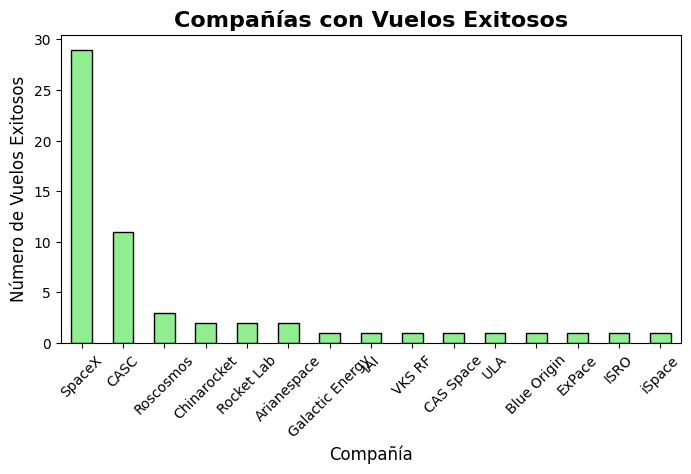


Vuelos exitosos por compañia:
company
SpaceX             29
CASC               11
Roscosmos           3
Chinarocket         2
Rocket Lab          2
Arianespace         2
Galactic Energy     1
IAI                 1
VKS RF              1
CAS Space           1
ULA                 1
Blue Origin         1
ExPace              1
ISRO                1
iSpace              1
Name: count, dtype: int64


In [ ]:
#Pregunta 1
#Vuelos exitosos por compañia

df_exitosos = df[df['successful'] == '1']

vuelos_exitosos_por_compania = df_exitosos['company'].value_counts()

plt.figure(figsize=(8, 4))
ax = vuelos_exitosos_por_compania.plot(kind='bar', color='lightgreen', edgecolor='black') #el ax creo que se puede quitar
plt.title('Compañías con Vuelos Exitosos', fontsize=16, fontweight='bold')
plt.xlabel('Compañía', fontsize=12)
plt.ylabel('Número de Vuelos Exitosos', fontsize=12)
plt.xticks(rotation=45)
plt.show()

print("\nVuelos exitosos por compañia:")
print(vuelos_exitosos_por_compania)

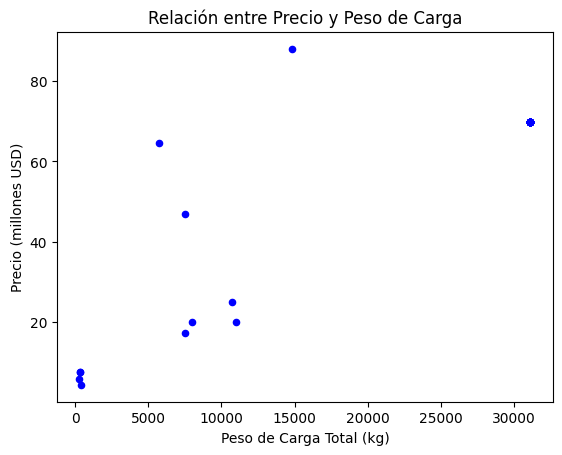

    price_million  total_payload_kg
0           17.42              7500
1           69.75             31100
4           69.75             31100
6           69.75             31100
7            4.38               400
8           20.00             11000
9           69.75             31100
10          69.75             31100
12          69.75             31100
13          69.75             31100
14          69.75             31100
15          69.75             31100
17          69.75             31100
19          69.75             31100
20           7.50               320
21          69.75             31100
22          69.75             31100
24          20.00              8020
26          69.75             31100
28          64.68              5700
30          69.75             31100
31          69.75             31100
34          88.00             14850
35          69.75             31100
37           7.50               320
39          69.75             31100
41          69.75           

In [56]:
# Relacion entre precio y peso de carga

df_valor_carga = df[['price_million', 'total_payload_kg']]
df_valor_carga = df_valor_carga[df_valor_carga['price_million'] > 0]

df_valor_carga.plot(kind='scatter', x='total_payload_kg', y='price_million', color='blue')
plt.title('Relación entre Precio y Peso de Carga')
plt.xlabel('Peso de Carga Total (kg)')
plt.ylabel('Precio (millones USD)')
plt.show()

print(df_valor_carga)

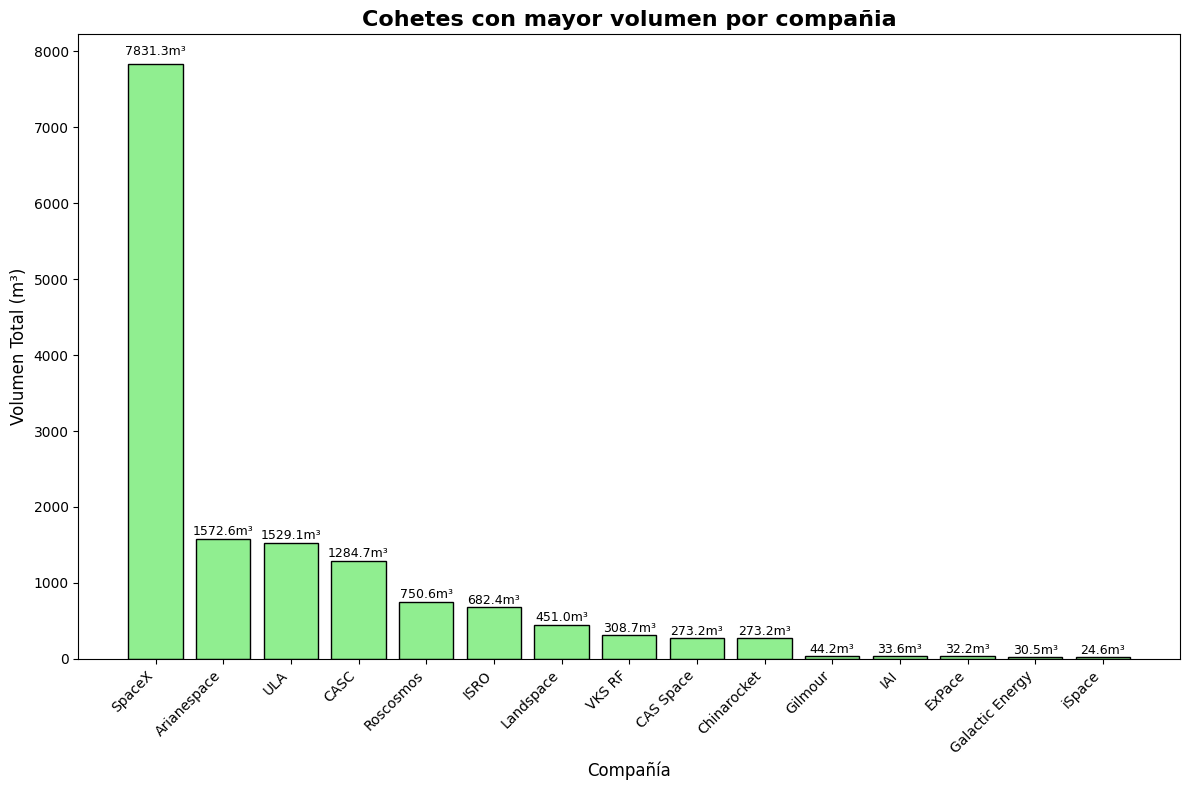

Cohetes con mayor volumen por compañia
            company  volumen_total_m3
0            SpaceX       7831.283627
1       Arianespace       1572.618451
2               ULA       1529.104251
3              CASC       1284.706982
4         Roscosmos        750.604012
5              ISRO        682.353924
6         Landspace        450.989697
7            VKS RF        308.661478
8         CAS Space        273.238058
9       Chinarocket        273.238058
10          Gilmour         44.178647
11              IAI         33.575595
12           ExPace         32.224363
13  Galactic Energy         30.531045
14           iSpace         24.579821


In [57]:
# Empresas con cohetes más grandes por volumen total

df_big_rockets = df.groupby('company')['volumen_total_m3'].max().sort_values(ascending=False)
df_big_rockets = df_big_rockets.rename("volumen_total_m3").reset_index()

df_big_rockets_display = df_big_rockets[['company', 'volumen_total_m3']].head(15)

# Crear gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(range(len(df_big_rockets_display)), df_big_rockets_display['volumen_total_m3'], color='lightgreen', edgecolor='black')

# Personalizar el gráfico
plt.title('Cohetes con mayor volumen por compañia', fontsize=16, fontweight='bold')
plt.xlabel('Compañía', fontsize=12)
plt.ylabel('Volumen Total (m³)', fontsize=12)

# Crear etiquetas solo con la compañía
labels = [row['company'] for _, row in df_big_rockets_display.iterrows()]
plt.xticks(range(len(df_big_rockets_display)), labels, rotation=45, ha='right', fontsize=10)

# Añadir valores encima de las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{height:.1f}m³', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Mostrar tabla con los datos
print('Cohetes con mayor volumen por compañia')
print(df_big_rockets_display)

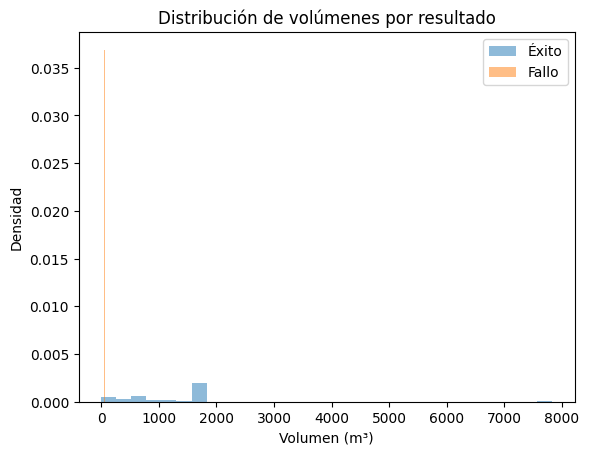

C:\Users\nicon\AppData\Local\Temp\ipykernel_14996\1335675319.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x_success.tolist(), x_fail.tolist()], labels=['Éxito', 'Fallo'], showfliers=True)


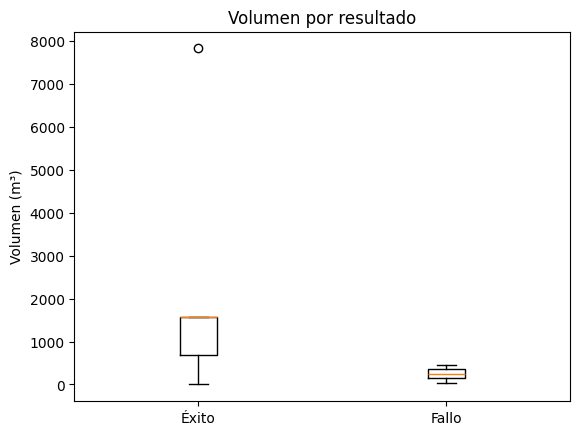

In [ ]:
#dudoso, nose si este bueno
df2 = df.copy()

x_success = df2.loc[df2['successful'] == '1', 'volumen_total_m3']
x_fail    = df2.loc[df2['successful'] == '0', 'volumen_total_m3']

plt.figure()
x_success.plot(kind='hist', bins=30, density=True, alpha=0.5, label='Éxito')
x_fail.plot(kind='hist',    bins=30, density=True, alpha=0.5, label='Fallo')
plt.xlabel('Volumen (m³)'); plt.ylabel('Densidad')
plt.title('Distribución de volúmenes por resultado'); plt.legend()
# plt.xscale('log')  # opcional si hay cola larga
plt.show()

# --- 2) Boxplot lado a lado (matplotlib) ---
plt.figure()
plt.boxplot([x_success.tolist(), x_fail.tolist()], labels=['Éxito', 'Fallo'], showfliers=True)
plt.ylabel('Volumen (m³)')
plt.title('Volumen por resultado')
# plt.yscale('log')  # opcional si hay outliers
plt.show()

In [78]:
dfExito = df[df['successful'] == '1']
dfFallo = df[df['successful'] == '0']

porcebtajeExito = float(f"{((len(dfExito) / len(df)) * 100):.2f}")
porcebtajeFallo = float(f"{((len(dfFallo) / len(df)) * 100):.2f}")

print(porcebtajeExito, porcebtajeFallo)

96.67 3.33
